In [1]:
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import os 

In [2]:
df = pd.read_csv('../data/bbdc_prof/bbdc_2023_AWI_data_develop_professional.csv',delimiter=';',skiprows=[1])
df.dtypes

Datum          object
Uhrzeit        object
SECCI         float64
Temperatur    float64
Salinität     float64
SiO4           object
PO4            object
NO2           float64
NO3           float64
NOx            object
NH4            object
dtype: object

In [3]:
indices = []
for name,c in df.items():
    if c.dtype != np.float64:
        
        empty_brakcets = c.dropna().str.contains('?',regex=False)
        indices.extend(c.dropna()[empty_brakcets].index.tolist())
df.loc[indices]

,Datum,Uhrzeit,SECCI,Temperatur,Salinität,SiO4,PO4,NO2,NO3,NOx,NH4
15559,08.08.2005,6:55,4.1,17.4,32.156,?18.44,0.40,0.17,3.55,3.71,2.58
16086,17.01.2007,10:05,1.0,8.0,30.966,13.80,?26.60,3.18,18.77,21.94,0.89
16233,13.06.2007,6:34,4.8,15.1,33.154,2.32,??3.38,0.10,5.06,5.16,0.01
15587,05.09.2005,6:50,5.0,17.3,31.933,2.04,0.31,0.01,NaN,? 25,0.16
15496,06.06.2005,6:50,3.5,11.4,32.438,1.71,0.03,0.07,8.81,8.88,? 6.41
15595,13.09.2005,6:05,3.0,17.4,32.210,1.04,0.36,0.09,3.48,3.57,? 8.22
16252,02.07.2007,7:16,8.0,16.1,33.183,2.06,0.24,0.25,1.28,1.54,??11.28
16255,05.07.2007,6:55,8.0,NaN,33.461,4.06,0.63,0.19,1.58,1.77,??10.32


In [4]:
df = df.drop(index = indices)
df.Uhrzeit = df.Uhrzeit.str.replace("L",':')

In [5]:
df.loc[3317,'Uhrzeit'] = '9:30'
df.index = pd.to_datetime(df.Datum,dayfirst=True)
df['missing_values'] = df.isna().sum(axis=1)
df['time_as_number'] = df.index.hour + df.index.minute / 60

<Axes: xlabel='Datum'>

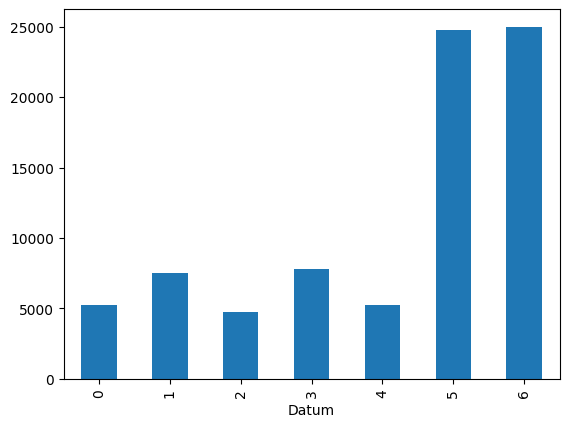

In [6]:
df.groupby(df.index.weekday)['missing_values'].sum().plot.bar()

In [7]:
mask = df.loc[df.index.weekday > 4].missing_values != 10
df.loc[df.index.weekday > 4].loc[mask]

,Datum,Uhrzeit,SECCI,Temperatur,Salinität,SiO4,PO4,NO2,NO3,NOx,NH4,missing_values,time_as_number
Datum,,,,,,,,,,,,,
1962-01-06,06.01.1962,9:00,NaN,5.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,0.0
1962-01-27,27.01.1962,9:00,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,0.0
1962-02-10,10.02.1962,9:15,NaN,3.9,31.990,NaN,0.66,1.40,15.42,NaN,11.60,3,0.0
1962-03-03,03.03.1962,9:00,NaN,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,0.0
1962-03-10,10.03.1962,9:00,NaN,3.1,32.023,NaN,0.69,0.80,16.57,NaN,10.60,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980-03-30,30.03.1980,8:45,NaN,4.0,33.091,3.90,0.48,0.97,12.67,NaN,5.48,2,0.0
1980-06-29,29.06.1980,7:45,NaN,12.9,32.233,3.30,0.22,0.68,4.00,NaN,4.39,2,0.0
1980-07-06,06.07.1980,9:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0.0


In [8]:
eval_df = pd.read_csv('../data/bbdc_prof/bbdc_2023_AWI_data_evaluate_skeleton_professional.csv',delimiter=';',skiprows=[1])
eval_df.index = pd.to_datetime(eval_df.Datum,dayfirst=True)

eval_df.index.weekday.unique()

Int64Index([4, 0, 1, 2, 3], dtype='int64', name='Datum')

In [9]:
df.isna().sum(0)

Datum                 0
Uhrzeit            6009
SECCI              8040
Temperatur         6108
Salinität          6299
SiO4               8142
PO4                7454
NO2                7377
NO3                7445
NOx               16077
NH4                7418
missing_values        0
time_as_number        0
dtype: int64

In [10]:
sers = (df.loc[df.Uhrzeit.isna()].missing_values < 10)
sers = sers[sers].index
df.loc[sers]

,Datum,Uhrzeit,SECCI,Temperatur,Salinität,SiO4,PO4,NO2,NO3,NOx,NH4,missing_values,time_as_number
Datum,,,,,,,,,,,,,
2005-09-02,02.09.2005,NaN,6.0,17.0,32.048,1.47,0.18,0.03,0.88,0.91,0.01,1,0.0
2007-11-01,01.11.2007,NaN,4.5,13.2,32.410,12.15,1.02,0.21,3.87,4.08,0.85,1,0.0
2007-11-02,02.11.2007,NaN,4.6,13.2,32.359,14.02,0.90,0.24,3.48,3.73,0.94,1,0.0
2007-11-05,05.11.2007,NaN,3.9,12.5,31.368,18.59,1.73,0.49,9.01,9.50,3.14,1,0.0
2007-11-06,06.11.2007,NaN,1.5,12.2,31.860,14.84,1.50,0.36,6.64,7.01,3.88,1,0.0
2007-11-07,07.11.2007,NaN,0.6,13.3,31.870,17.99,1.61,0.34,6.24,6.57,1.91,1,0.0
2007-11-08,08.11.2007,NaN,0.7,12.2,31.743,16.92,1.35,0.51,6.54,7.05,1.54,1,0.0
2007-11-12,12.11.2007,NaN,0.2,10.1,29.971,19.41,1.61,0.70,12.49,13.19,1.76,1,0.0
2007-11-13,13.11.2007,NaN,1.0,10.0,28.980,16.79,2.01,0.66,11.33,11.99,2.93,1,0.0


In [11]:
average_time_per_year = df.groupby(df.index.year).time_as_number.mean()

for d in sers:
    set_to = average_time_per_year.loc[d.year]
    
    hour = np.floor(set_to)
    minutes = np.round((set_to - hour) * 60).astype(int)
    
    uhrzeit = f'{int(hour)}:{int(minutes)}'
    
    df.loc[d,'Uhrzeit'] = uhrzeit

old_index = df.index.copy()
    
df.index = pd.to_datetime(df.index.to_series().apply(str) + " " + df.Uhrzeit)
    
df['time_as_number'] = df.index.hour + df.index.minute / 60
df.index = old_index
df.loc[df.Uhrzeit.isna()].missing_values.value_counts()

10    5985
Name: missing_values, dtype: int64

Set missing values to 0

In [12]:
df = df.loc[(df.index.weekday < 5) & df.Uhrzeit.notna()]

<Axes: xlabel='Datum'>

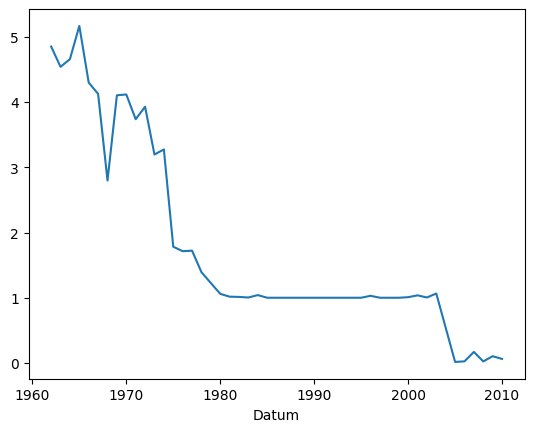

In [13]:
df.groupby(df.index.year).missing_values.mean().plot()

<Axes: xlabel='Datum'>

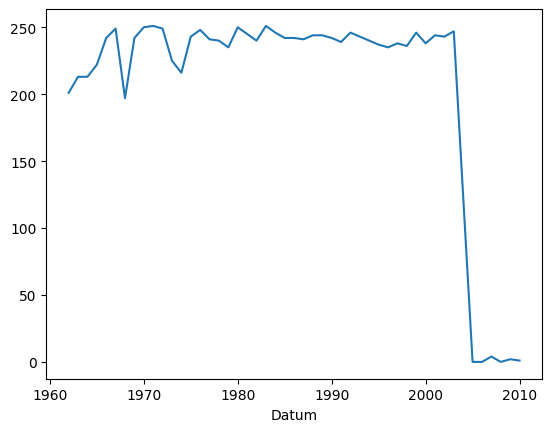

In [14]:
df.groupby(df.index.year)['NOx'].apply(lambda x: x.isna().sum()).plot()

In [15]:
labels = [ 'SECCI', 'Temperatur', 'Salinität', 'SiO4', 'PO4', 'NO2', 'NO3', 'NOx', 'NH4']

<Axes: xlabel='Datum'>

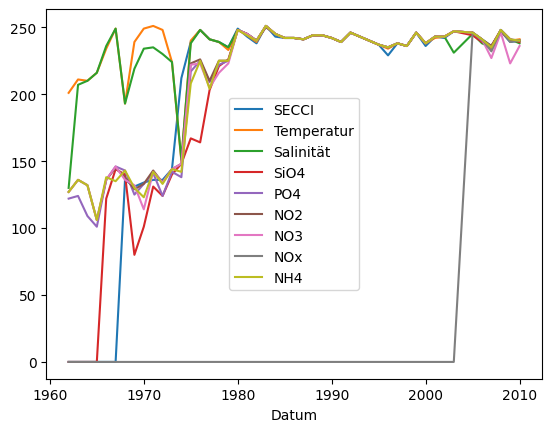

In [16]:
df.groupby(df.index.year)[labels].count().plot()

In [17]:
for d in labels:
    df[d]  = pd.to_numeric(df[d])

In [18]:
df[[ 'SECCI', 'Temperatur', 'Salinität', 'SiO4', 'PO4', 'NO2', 'NO3', 'NOx', 'NH4']].corr()

,SECCI,Temperatur,Salinität,SiO4,PO4,NO2,NO3,NOx,NH4
SECCI,1.000000,0.324277,0.078326,-0.342632,-0.498037,-0.320503,-0.204933,-0.295367,-0.199637
Temperatur,0.324277,1.000000,-0.139849,-0.354353,-0.240758,-0.447394,-0.488717,-0.679918,-0.016045
Salinität,0.078326,-0.139849,1.000000,-0.137951,-0.023714,0.003984,-0.343968,-0.366975,-0.150197
SiO4,-0.342632,-0.354353,-0.137951,1.000000,0.329660,0.280374,0.483753,0.633932,0.067013
PO4,-0.498037,-0.240758,-0.023714,0.329660,1.000000,0.377247,0.127071,0.304460,0.283174
NO2,-0.320503,-0.447394,0.003984,0.280374,0.377247,1.000000,0.203130,0.456165,0.092690
NO3,-0.204933,-0.488717,-0.343968,0.483753,0.127071,0.203130,1.000000,0.997590,-0.090504
NOx,-0.295367,-0.679918,-0.366975,0.633932,0.304460,0.456165,0.997590,1.000000,-0.088704
NH4,-0.199637,-0.016045,-0.150197,0.067013,0.283174,0.092690,-0.090504,-0.088704,1.000000


<Axes: xlabel='Datum'>

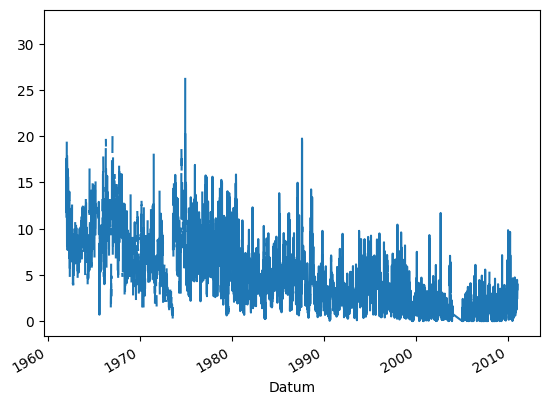

In [19]:
df.NH4.plot()

<Axes: xlabel='Datum'>

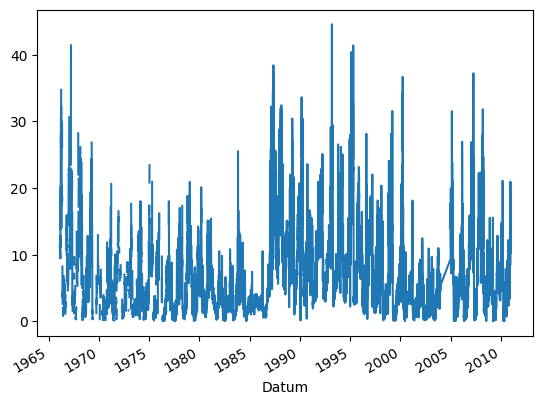

In [20]:
df.SiO4.plot()

<Axes: xlabel='Datum'>

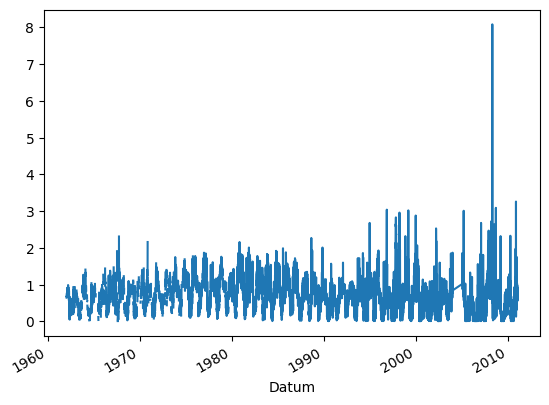

In [21]:
df.PO4.plot()

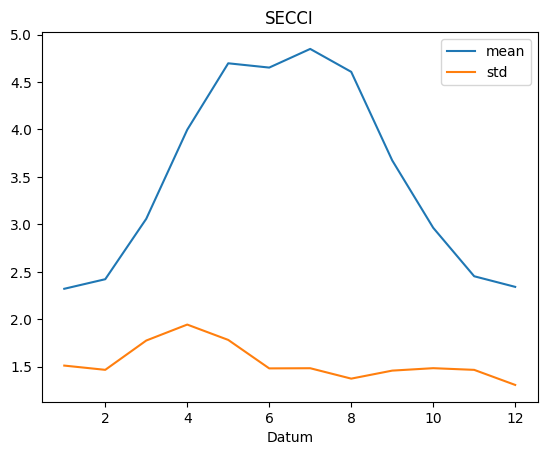

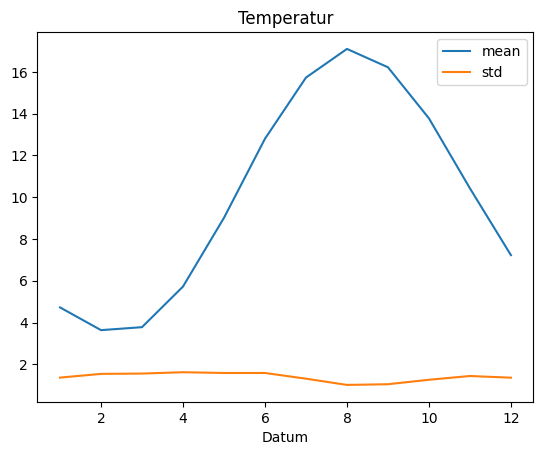

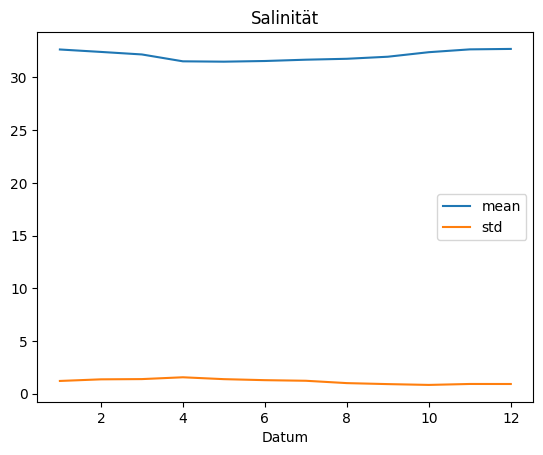

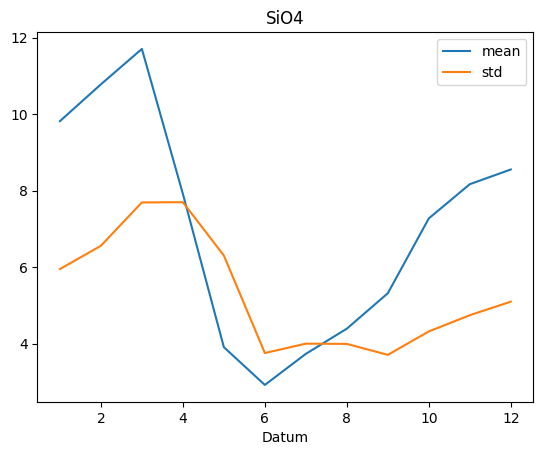

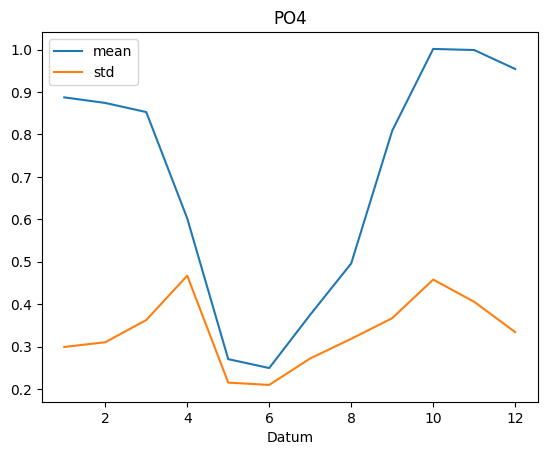

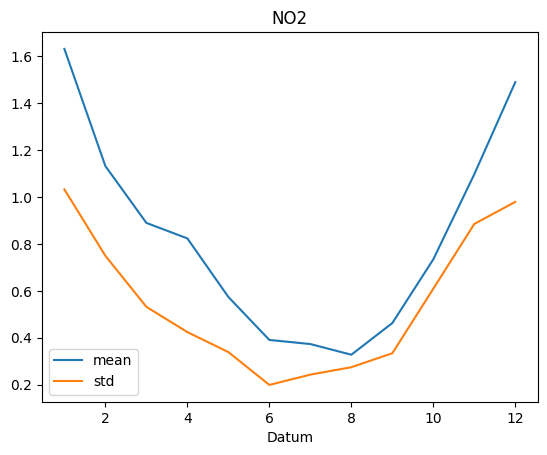

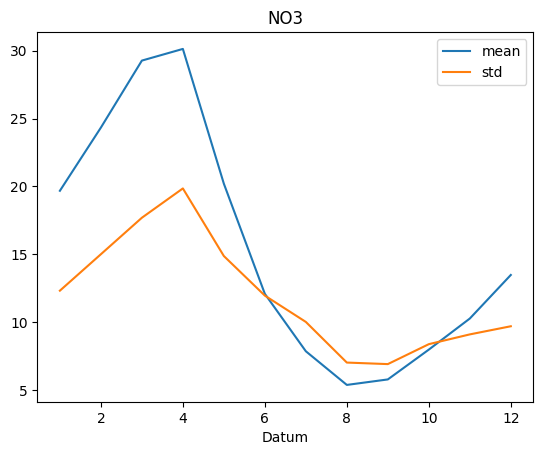

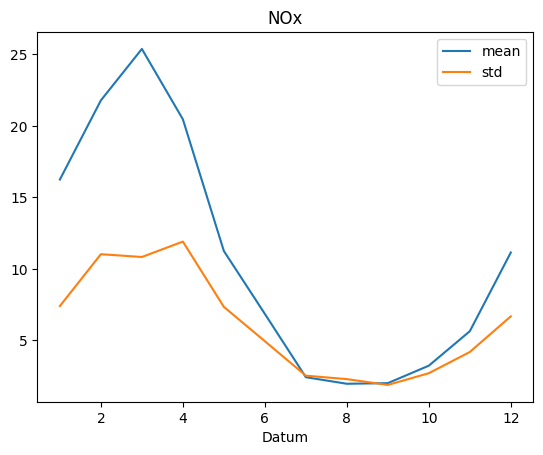

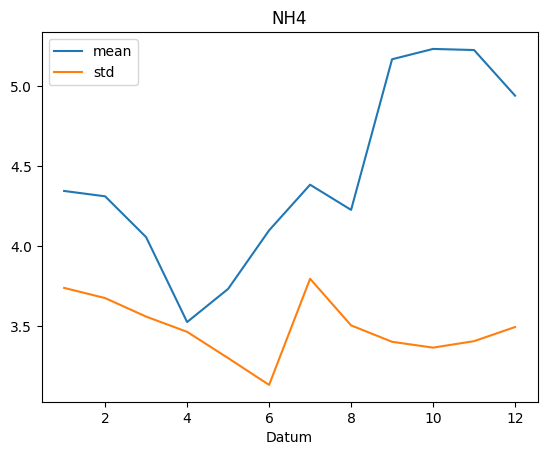

In [22]:
for c in labels:
    
    df.groupby(df.index.month)[c].agg(['mean',np.std]).plot()
    plt.title(c)
    plt.show()
    

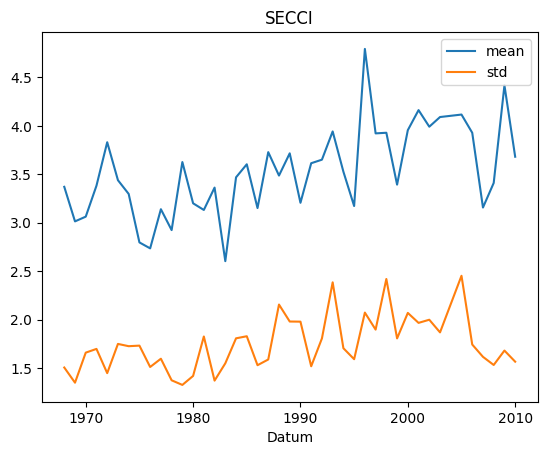

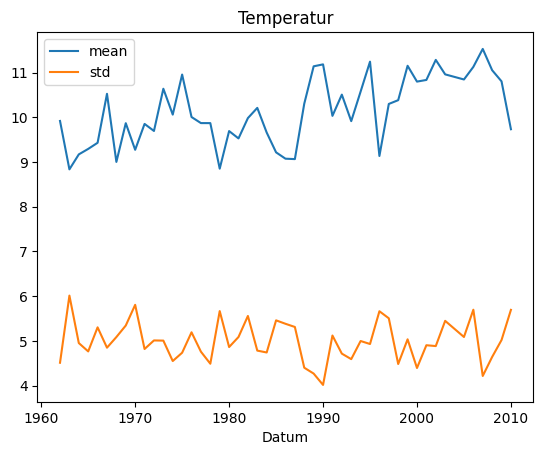

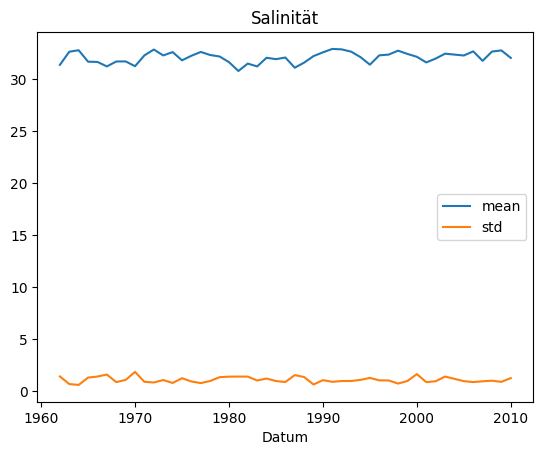

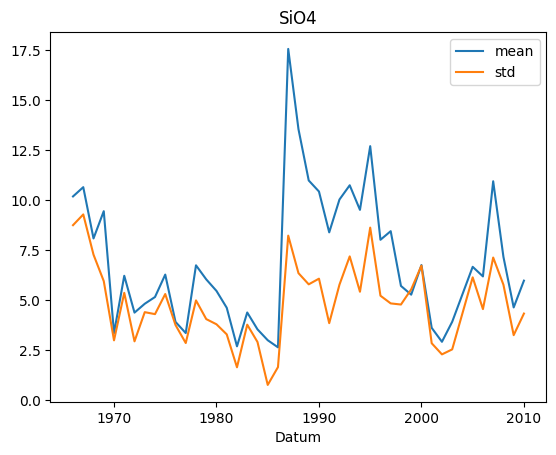

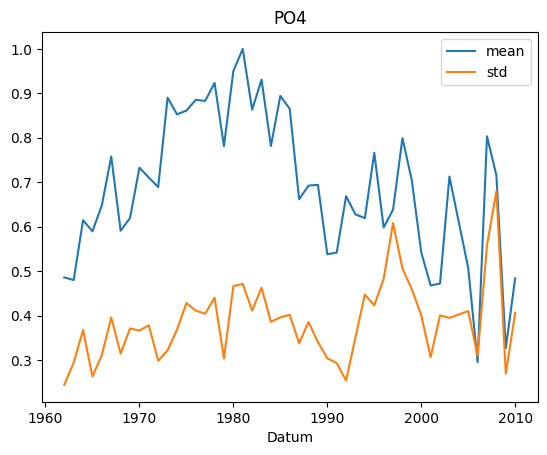

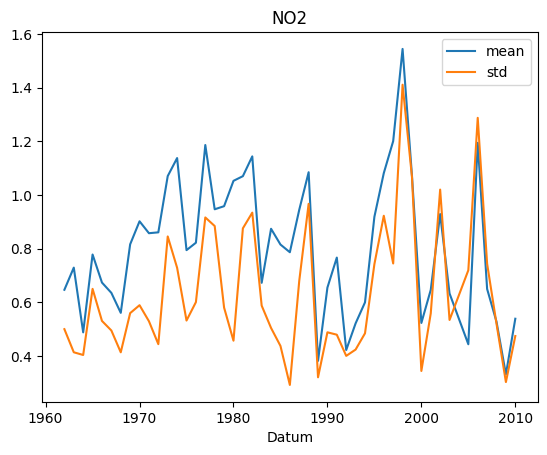

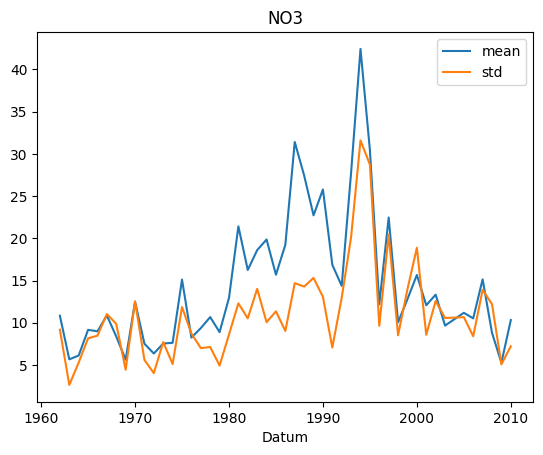

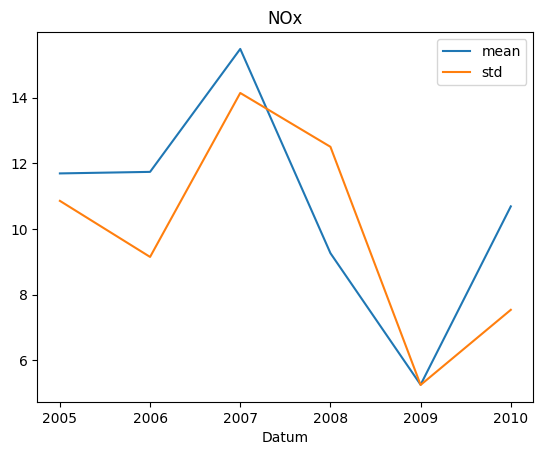

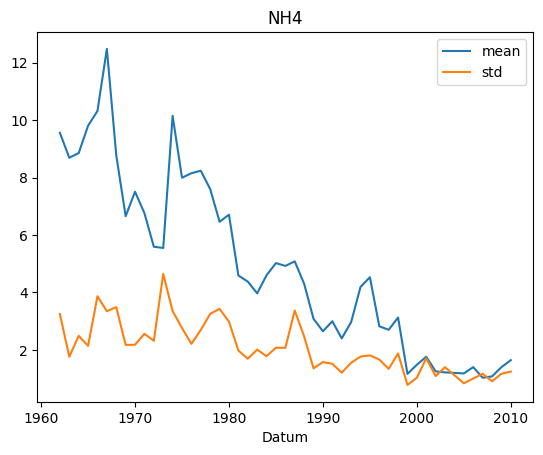

In [23]:
for c in labels:
    
    df.groupby(df.index.year)[c].agg(['mean',np.std]).plot()
    plt.title(c)
    plt.show()
    

In [24]:
df = df.drop(columns=['missing_values','Datum',"Uhrzeit"])

In [25]:
df

,SECCI,Temperatur,Salinität,SiO4,PO4,NO2,NO3,NOx,NH4,time_as_number
Datum,,,,,,,,,,
1962-01-02,NaN,4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000
1962-01-03,NaN,5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000
1962-01-04,NaN,4.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000
1962-01-05,NaN,5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000
1962-01-08,NaN,5.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000
...,...,...,...,...,...,...,...,...,...,...
2010-12-21,2.6,4.0,30.861,11.11,0.63,0.52,18.85,19.37,2.39,9.416667
2010-12-22,2.7,4.2,31.643,11.03,0.55,0.44,12.98,13.43,2.45,8.250000
2010-12-28,1.9,2.9,30.137,18.46,0.93,0.81,26.10,26.91,3.64,8.500000


In [26]:
df.to_csv('../data/prof_trainigns_df.csv')